In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from scipy.integrate import simpson
from scipy.stats import gaussian_kde
from scipy.stats import norm

In [2]:
with open('/home/yaning/Documents/Discounting/paper/results/cafe.pkl', 'rb') as f:
    pos_dict = pickle.load(f)

In [ ]:
cafe_mu = pos_dict["mu"]
cafe_tau = pos_dict["tau"]
cafe_locs = pos_dict['locs']

In [9]:
with open('/home/yaning/Documents/Discounting/paper/results/gamble.pkl', 'rb') as f:
    pos_dict = pickle.load(f)

In [5]:
gamble_mu = pos_dict["mu"]
gamble_tau = pos_dict["tau"]
gamble_locs = pos_dict['locs']

In [6]:
mean_cafe_locs = np.mean(cafe_locs, axis=1)
mean_gamble_locs = np.mean(gamble_locs, axis=1)

In [7]:
cafe_sigma = 1/(cafe_tau)**0.5
gamble_sigma = 1/(gamble_tau)**0.5

In [17]:
with open('Documents/pyro_models/files_to_run/results/logistic_ohne_sigma_es_and_c_cafe.pkl', 'rb') as f:
    pos_dict = pickle.load(f)

In [18]:
pos_cafe = pos_dict["m_locs"]

In [19]:
with open('Documents/pyro_models/files_to_run/results/logistic_ohne_sigma_es_and_c_gamble.pkl', 'rb') as f:
    pos_dict = pickle.load(f)

In [20]:
pos_gamble = pos_dict["m_locs"]

In [26]:
mean_pos_cafe = np.mean(pos_cafe, axis=0)
mean_pos_gamble = np.mean(pos_gamble, axis=0)

this
0.025952714
0.02202136
this
-0.5829932
-0.5909368
this
0.33106908
0.34411365
this
1.5700972
1.5883592
this
0.97075146
0.9505996


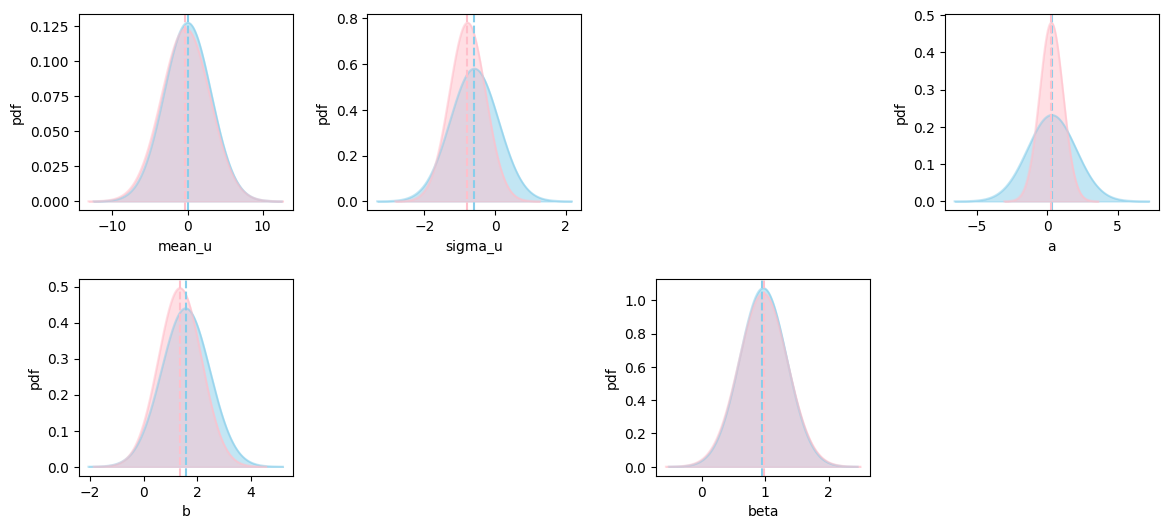

In [30]:
# plot the distributions with mu and sigma
fig = plt.figure(constrained_layout=False, figsize=(12,6))
gs = fig.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.95, wspace=0.35, hspace=0.35)


# Create a 2x4 array to store the axes
axes = []

# Add subplots to the array
axes.append(fig.add_subplot(gs[0, 0], xlabel='mean_u', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 1], xlabel='sigma_u', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 3], xlabel='a', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 0], xlabel='b', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 2], xlabel='beta', ylabel='pdf'))

for i in range(cafe_mu.shape[1]):
    temp_mean_cafe = np.mean(cafe_mu[:,i])
    temp_sigma_cafe = np.mean(cafe_sigma[:,i])
    temp_mean_gamble = np.mean(gamble_mu[:,i])
    temp_sigma_gamble = np.mean(gamble_sigma[:,i])

    print("this")
    print(temp_mean_cafe)
    print(mean_pos_cafe[i])

    x_cafe = np.linspace(temp_mean_cafe - 4*temp_sigma_cafe, temp_mean_cafe + 4*temp_sigma_cafe, 1000)
    x_gamble = np.linspace(temp_mean_gamble - 4*temp_sigma_gamble, temp_mean_gamble + 4*temp_sigma_gamble, 1000)
    y_cafe = norm.pdf(x_cafe, temp_mean_cafe, temp_sigma_cafe)
    y_gamble = norm.pdf(x_gamble, temp_mean_gamble, temp_sigma_gamble)

    # sns.kdeplot(y_cafe, fill=True, color='skyblue', alpha=0.5, ax=axes[i])
    # sns.kdeplot(y_gamble, fill=True, color='pink', alpha=0.5, ax=axes[i])
    sns.lineplot(x=x_cafe, y=y_cafe, ax=axes[i], color='skyblue', alpha=0.5)
    axes[i].fill_between(x_cafe, y_cafe, color = 'skyblue', alpha=0.5)
    sns.lineplot(x=x_gamble, y=y_gamble, ax=axes[i], color='pink', alpha=0.5)
    axes[i].fill_between(x_gamble, y_gamble, color = 'pink', alpha=0.5)

    axes[i].axvline(x=mean_pos_cafe[i], color='skyblue', linestyle='--')
    axes[i].axvline(x=mean_pos_gamble[i], color='pink', linestyle='--')

plt.show()
plt.close()


this
0.015116519
0.02202136
this
-0.5908126
-0.5909368
this
0.34423217
0.34411365
this
1.5909846
1.5883592
this
0.94962347
0.9505996


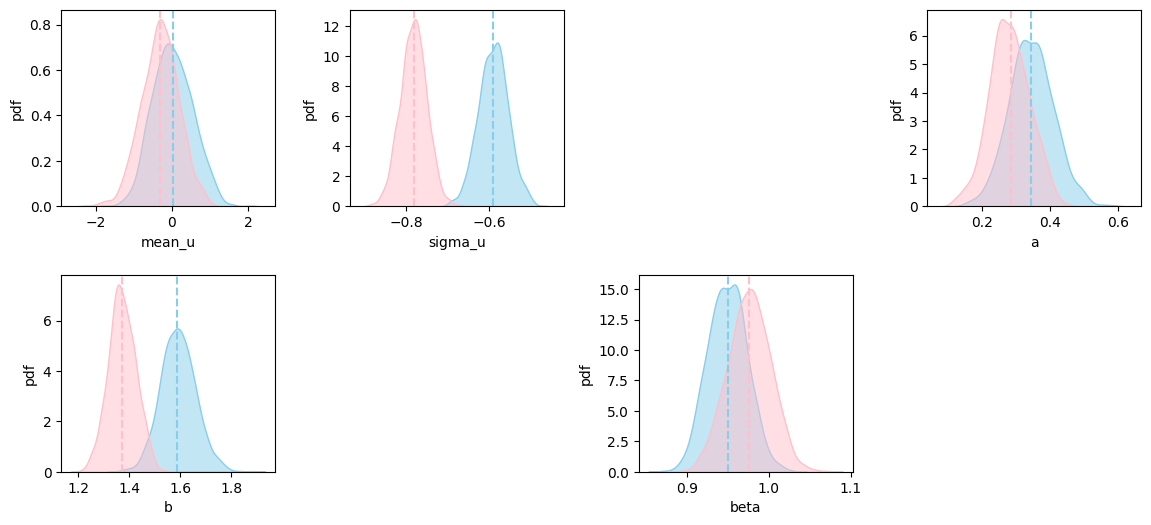

In [32]:
# plot the posterior with locs
fig = plt.figure(constrained_layout=False, figsize=(12,6))
gs = fig.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.95, wspace=0.35, hspace=0.35)


# Create a 2x4 array to store the axes
axes = []

# Add subplots to the array
axes.append(fig.add_subplot(gs[0, 0], xlabel='mean_u', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 1], xlabel='sigma_u', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 3], xlabel='a', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 0], xlabel='b', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 2], xlabel='beta', ylabel='pdf'))

for i in range(mean_cafe_locs.shape[1]):
    sns.kdeplot(mean_cafe_locs[:,i], fill=True, color='skyblue', alpha=0.5, ax=axes[i])
    sns.kdeplot(mean_gamble_locs[:,i], fill=True, color='pink', alpha=0.5, ax=axes[i])

    print("this")
    print(np.mean(mean_cafe_locs, axis=0)[i])
    print(mean_pos_cafe[i])
    axes[i].axvline(x=mean_pos_cafe[i], color='skyblue', linestyle='--')
    axes[i].axvline(x=mean_pos_gamble[i], color='pink', linestyle='--')
    

plt.show()
plt.close()

In [47]:
# get the means of mu and tau
mean_cafe_mu = np.mean(cafe_mu, axis=0)
mean_gamble_mu = np.mean(gamble_mu, axis=0)
mean_cafe_sigma = 1/(np.mean(cafe_tau, axis=0))**0.5
mean_gamble_sigma = 1/(np.mean(gamble_tau, axis=0))**0.5

In [14]:
mean_cafe_tau

array([3.1796815 , 0.67255133, 1.7255658 , 0.92060256, 0.374443  ],
      dtype=float32)

In [48]:
# sample from the two normal distributions
cafe = []
gamble = []
sample_num = 1000

for i in range(mean_cafe_mu.shape[0]):
    temp = np.random.normal(loc=mean_cafe_mu[i], scale=mean_cafe_sigma[i], size=sample_num)
    cafe.append(temp)
    temp = np.random.normal(loc=mean_gamble_mu[i], scale=mean_gamble_sigma[i], size=sample_num)
    gamble.append(temp)


In [49]:
cafe = np.array(cafe)
gamble = np.array(gamble)

In [50]:
cafe.shape

(7, 1000)

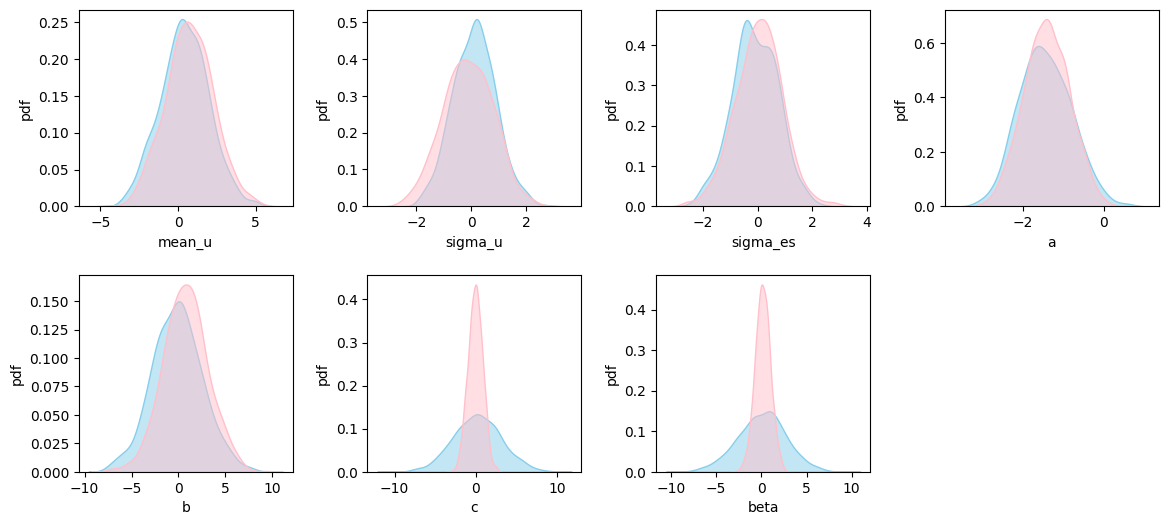

In [51]:
# plot the posterior with simulated data
fig = plt.figure(constrained_layout=False, figsize=(12,6))
gs = fig.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.95, wspace=0.35, hspace=0.35)


# Create a 2x4 array to store the axes
axes = []

# Add subplots to the array
axes.append(fig.add_subplot(gs[0, 0], xlabel='mean_u', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 1], xlabel='sigma_u', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 2], xlabel='sigma_es', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 3], xlabel='a', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 0], xlabel='b', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 1], xlabel='c', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 2], xlabel='beta', ylabel='pdf'))

for i in range(cafe.shape[0]):
    sns.kdeplot(cafe[i], fill=True, color='skyblue', alpha=0.5, ax=axes[i])
    sns.kdeplot(gamble[i], fill=True, color='pink', alpha=0.5, ax=axes[i])

plt.show()
plt.close()

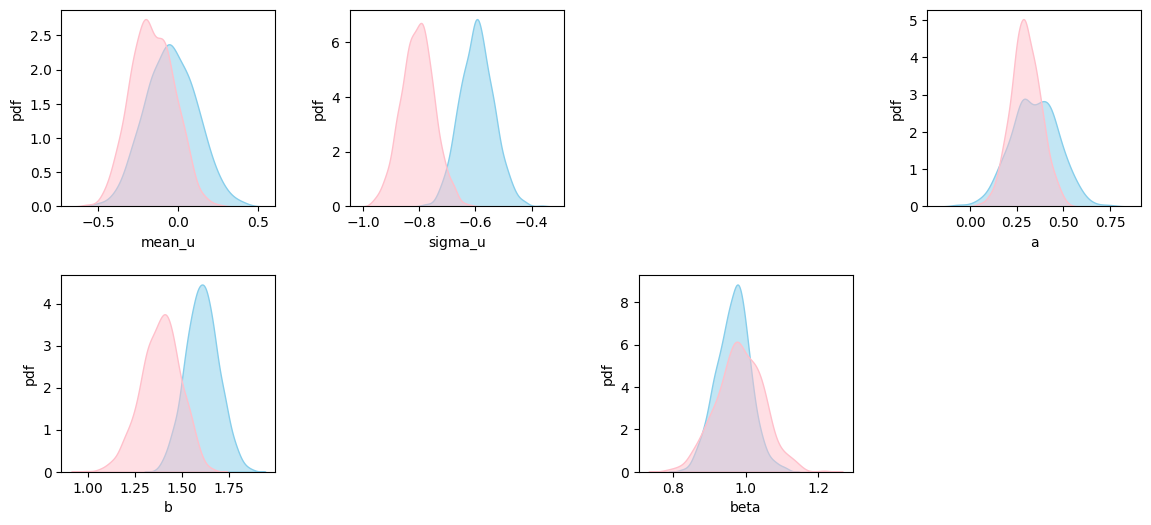

In [15]:
# plot the posterior with simulated data
fig = plt.figure(constrained_layout=False, figsize=(12,6))
gs = fig.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.95, wspace=0.35, hspace=0.35)


# Create a 2x4 array to store the axes
axes = []

# Add subplots to the array
axes.append(fig.add_subplot(gs[0, 0], xlabel='mean_u', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 1], xlabel='sigma_u', ylabel='pdf'))
# axes.append(fig.add_subplot(gs[0, 2], xlabel='sigma_es', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 3], xlabel='a', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 0], xlabel='b', ylabel='pdf'))
# axes.append(fig.add_subplot(gs[1, 1], xlabel='c', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 2], xlabel='beta', ylabel='pdf'))

for i in range(cafe_mu.shape[1]):
    sns.kdeplot(cafe_mu[:,i], fill=True, color='skyblue', alpha=0.5, ax=axes[i])
    sns.kdeplot(gamble_mu[:,i], fill=True, color='pink', alpha=0.5, ax=axes[i])

plt.show()
plt.close()

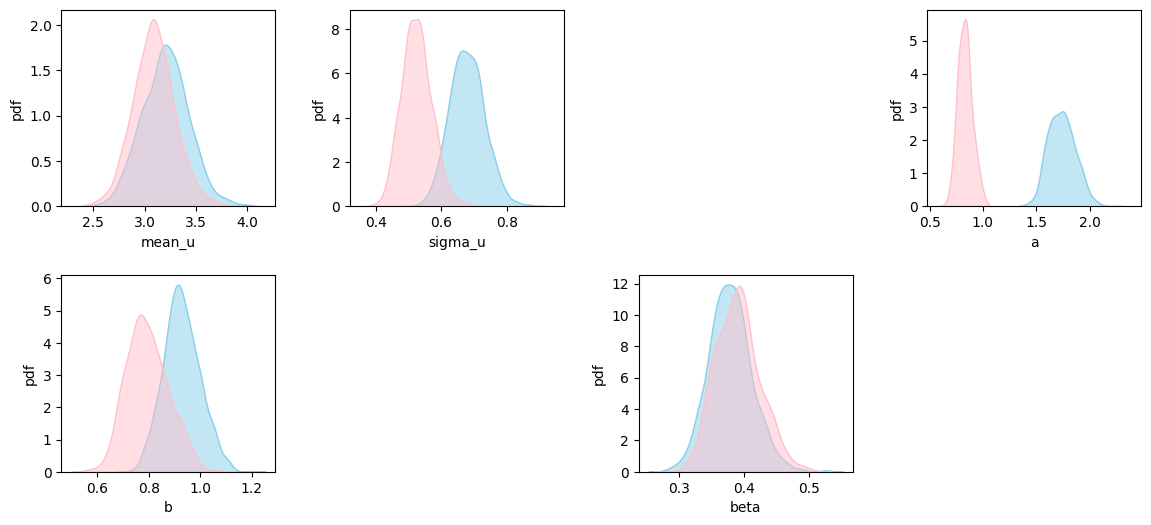

In [16]:
# plot the posterior with simulated data
fig = plt.figure(constrained_layout=False, figsize=(12,6))
gs = fig.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.95, wspace=0.35, hspace=0.35)


# Create a 2x4 array to store the axes
axes = []

# Add subplots to the array
axes.append(fig.add_subplot(gs[0, 0], xlabel='mean_u', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 1], xlabel='sigma_u', ylabel='pdf'))
# axes.append(fig.add_subplot(gs[0, 2], xlabel='sigma_es', ylabel='pdf'))
axes.append(fig.add_subplot(gs[0, 3], xlabel='a', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 0], xlabel='b', ylabel='pdf'))
# axes.append(fig.add_subplot(gs[1, 1], xlabel='c', ylabel='pdf'))
axes.append(fig.add_subplot(gs[1, 2], xlabel='beta', ylabel='pdf'))

# sigma is the 1/(tau)**0.5
for i in range(cafe_tau.shape[1]):
    sns.kdeplot(1/(cafe_tau[:,i])**0.5, fill=True, color='skyblue', alpha=0.5, ax=axes[i])
    sns.kdeplot(1/(gamble_tau[:,i])**0.5, fill=True, color='pink', alpha=0.5, ax=axes[i])

plt.show()
plt.close()

In [40]:
def get_the_BFkl(cafe, gamble):
    # get the density functions of both
    kde_cafe = gaussian_kde(cafe, bw_method='scott')
    kde_gamble = gaussian_kde(gamble, bw_method='scott')

    # sample from both density functions
    cafe_samples = kde_cafe.resample(size=1000)
    gamble_samples = kde_gamble.resample(size=1000)

    # difference between the samples (central something theory)
    diff = cafe_samples - gamble_samples
    diff = diff.reshape(1000)

    # get the density function of the difference
    kde_diff = gaussian_kde(diff, bw_method='scott')

    x = np.linspace(diff.min(), diff.max(), 1000)
    if x.min() > 0:
        mode = 'all pos'
        return mode
    elif x.max() < 0:
        mode = 'all neg'
        return mode

    x_pos = x[x > 0]
    x_neg = x[x < 0]

    y_pos = kde_diff(x_pos)
    y_neg = kde_diff(x_neg)

    inte_pos = simpson(y_pos, x = x_pos)
    inte_neg = simpson(y_neg, x = x_neg)

    if inte_pos > inte_neg:
        BFkl =  inte_pos / inte_neg if inte_neg != 0 else np.inf
        mode = 'pos bigger'
    else:
        BFkl =  inte_neg / inte_pos if inte_pos != 0 else np.inf
        mode = 'neg bigger'

    return {BFkl, mode}

In [41]:
score = []
for i in range(cafe.shape[0]):
    score.append(get_the_BFkl(cafe[i], gamble[i]))

In [42]:
score

[{1.093659278213718, 'pos bigger'},
 {1.5545949353412116, 'pos bigger'},
 {1.102453015660957, 'neg bigger'},
 {1.0894159817847868, 'neg bigger'},
 {1.0188712120392862, 'neg bigger'},
 {1.08827023215623, 'neg bigger'},
 {1.060835860628113, 'pos bigger'}]

In [18]:
mu = []
sig = []
for i in range(cafe_mu.shape[1]):
    mu.append(get_the_BFkl(cafe_mu[:,i], gamble_mu[:,i]))

In [19]:
mu

[{2.450486239488586, 'pos bigger'},
 {107.24192220963195, 'pos bigger'},
 {1.509070143404556, 'pos bigger'},
 {14.744878726298719, 'pos bigger'},
 {1.47120138139248, 'neg bigger'}]

In [20]:
for i in range(cafe_tau.shape[1]):
    sig.append(get_the_BFkl(1/(cafe_tau[:,i])**0.5, 1/(gamble_tau[:,i])**0.5))

In [21]:
sig

[{1.6351350116153345, 'pos bigger'},
 {44.91501865806305, 'pos bigger'},
 'all pos',
 {7.5613248215414455, 'pos bigger'},
 {1.2953649277640207, 'neg bigger'}]